### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

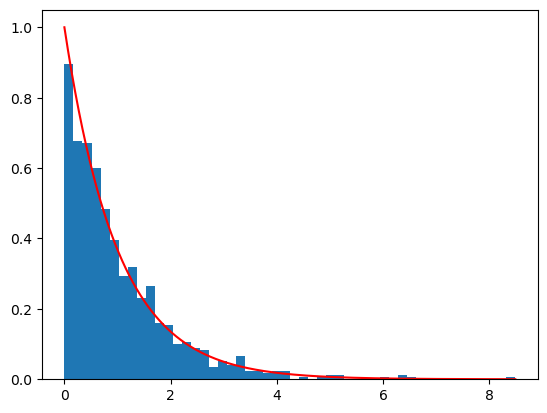

Parametro di forma: 1.0099446150190763


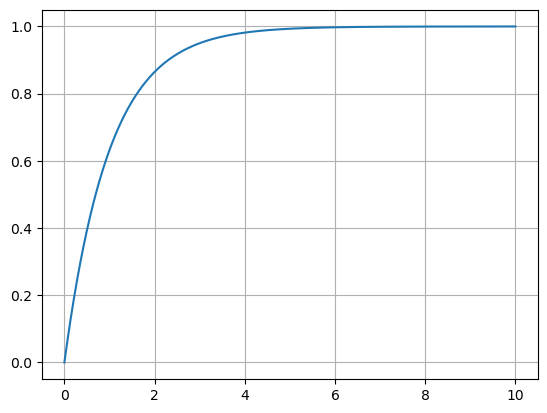

Varianza: 0.9995253401986393


In [1]:
from scipy.stats import gamma
import matplotlib.pyplot as plt
import numpy as np

#1)
samples = gamma.rvs(a=1, size=1000)
#print(samples[:10])

#2)
line = np.linspace(0, max(samples), 1000)
pdf = gamma.pdf(line, 1)
plt.hist(samples, bins=50, density=True)

plt.plot(line, pdf, "r-",label = "PDF")
plt.show()

#3)
print("Parametro di forma: {}".format(gamma.fit(samples)[0]))

#4)
line = np.linspace(0,10,1000)
cdf = gamma.cdf(line, a=1)

plt.plot(line, cdf)
plt.grid(True)
plt.show()

#5)
print("Varianza: {}".format(np.var(samples, ddof=0)))

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

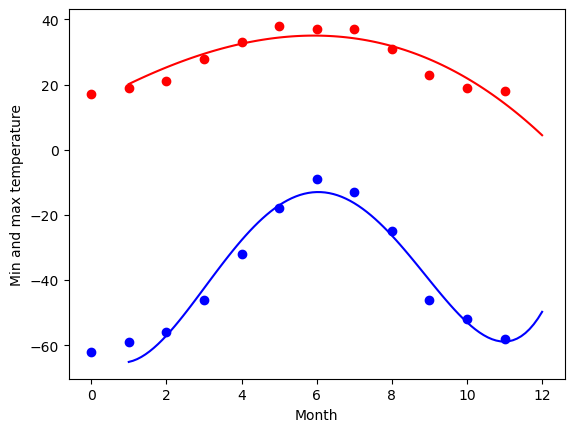

MAE max: 2.565934065934067
RMSE max: 2.8954475273464015
MAE min: 2.9569735819736844
RMSE min: 3.487912490377805


In [2]:
import numpy as np
import matplotlib.pyplot as plt

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")

#1)
coeffs_max = np.polyfit(months, temp_max, deg = 3)
coeffs_min = np.polyfit(months, temp_min, deg = 4)

poly_max = np.poly1d(coeffs_max)
poly_min = np.poly1d(coeffs_min)

x_fit = np.linspace(1, 12, 100)
plt.plot(x_fit, poly_max(x_fit), 'r-', label='Max Temp (fit)')
plt.plot(x_fit, poly_min(x_fit), 'b-', label='Min Temp (fit)')

plt.show()

#2)
pred_max = poly_max(months)
pred_min = poly_min(months)

def mae(real_data, predictions):

    if(len(real_data)  !=  len(predictions)):
        raise Exception("Le liste devopno essere di lunghezza uguale")

    mae = 0

    for i in range(0, len(real_data)):
        mae = mae + np.abs(real_data[i] - predictions[i])

    return mae / len(real_data)

def rmse(real_data, predictions):

    if(len(real_data)  !=  len(predictions)):
        raise Exception("Le liste devopno essere di lunghezza uguale")

    rmse = 0

    for i in range(0, len(real_data)):
        rmse = rmse + (np.abs(real_data[i] - predictions[i]) ** 2)

    return np.sqrt(rmse / len(real_data))

print("MAE max: {}".format(mae(temp_max, pred_max)))
print("RMSE max: {}".format(rmse(temp_max, pred_max)))

print("MAE min: {}".format(mae(temp_min, pred_min)))
print("RMSE min: {}".format(rmse(temp_min, pred_min)))


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

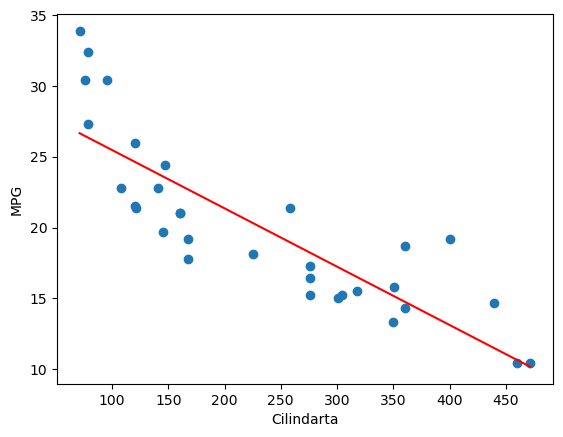

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

disp = np.array(df["disp"])
mpg = np.array(df["mpg"])

coeffs = np.polyfit(disp, mpg, deg=1)
model = np.poly1d(coeffs)

x_fit = np.linspace(min(disp), max(disp), 100)
y_fit = model(x_fit)

plt.plot(disp, mpg, "o", label="Dati")
plt.plot(x_fit, y_fit, 'r-', label='Fit')
plt.xlabel("Cilindarta")
plt.ylabel("MPG")

plt.show()